In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
c:\Users\avina\Anaconda3\envs\deep_learning_exploration\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\Users\avina\Anaconda3\envs\deep_learning_exploration\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size.

In [4]:
print(f"Train_data shape:{train_data.shape}")
print(f"Train_lable shape:{train_labels.shape}")
print(f"Test Data shape:{test_data.shape}")
print(f"Test Labels shape:{test_labels.shape}")

Train_data shape:(25000,)
Train_lable shape:(25000,)
Test Data shape:(25000,)
Test Labels shape:(25000,)


The variables train_data and test_data are lists of reviews; each review is a list of word indices (encoding a sequence of words). train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive.

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
#word_index is a dictionary mapping words to an integer index.
word_index = imdb.get_word_index()
# word_index

#reversing the word index bringing key at first then value
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

#Decodes the review. Note that the indicesare offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data:-

Pad your lists so that they all have the same length, turn them into an integer tensor of shape (samples, word_indices), and then use as the first layer in your network a layer capable of handling such integer tensors (the Embedding layer, which we’ll cover in detail later in the book).

One-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then you could use as the first layer in your network a Dense layer, capable of handling floating-point vector data.

In [7]:
import numpy as np

In [18]:
#Encoding the integer sequences into a binary matrix
def vectorize_sequences(sequences, dimension=10000):
    #Creates an all-zero matrix of shape (len(sequences),dimension)
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        #Sets specific indices of results[i] to 1s
        results[i, sequence] = 1.
    return results



x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [19]:
print(f"X_Train_data shape:{x_train.shape}")
print(f"X_Test_data shape:{x_test.shape}")

X_Train_data shape:(25000, 10000)
X_Test_data shape:(25000, 10000)


In [20]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [21]:
#vectorize your labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [22]:
y_train[0]

1.0

### Building network:-

The argument being passed to each Dense layer (16) is the number of hidden units of the layer. A hidden unit is a dimension in the representation space of the layer.

each such Dense layer with a relu activation implements the following chain of tensor operations:
output = relu(dot(W, input) + b)

Having 16 hidden units means the weight matrix W will have shape (input_dimension,16): the dot product with W will project the input data onto a 16-dimensional representation space (and then you’ll add the bias vector b and apply the relu operation).

There are two key architecture decisions to be made about such a stack of Dense layers:
- How many layers to use
- How many hidden units to choose for each layer

The intermediate layers will use relu as their activation function, and the final layer will use a sigmoid activation 
so as to output a probability (a score between 0 and 1, indicating how likely the sample is to have the target “1”:
how likely the review is to be positive).

In [23]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
#or

from keras import regularizers


#Adding L2 weight regularization to the model
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



l2(0.001) means every coefficient in the weight matrix of the layer will add 0.001 *
weight_coefficient_value to the total loss of the network.

In [ ]:
#regularizer can also be used as 
from keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

In [5]:
# using drop out regularizer for example


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
#Compiling the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

### OR

In [27]:
#Configuring the optimizer
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

### OR 

In [28]:
#Using custom losses and metrics
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

### Validating your approach
In order to monitor during training the accuracy of the model on data we have never seen before,we’ll create a validation set by setting apart 10,000 samples from the original training data.

In [29]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [30]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Training the model
train the model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), in mini-batches of 512 samples. At the same time, we’ll monitor loss and accuracy on the 10,000 samples that you set apart. We do so by
passing the validation data as the validation_data argument.

In [31]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
history

Epoch 1/20
30/30 [==============================] - 3s 84ms/step - loss: 0.5332 - binary_accuracy: 0.7930 - val_loss: 0.4059 - val_binary_accuracy: 0.8692
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3280 - binary_accuracy: 0.8961 - val_loss: 0.3240 - val_binary_accuracy: 0.8771
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2379 - binary_accuracy: 0.9225 - val_loss: 0.2885 - val_binary_accuracy: 0.8864
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1859 - binary_accuracy: 0.9386 - val_loss: 0.2759 - val_binary_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1514 - binary_accuracy: 0.9508 - val_loss: 0.2791 - val_binary_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1229 - binary_accuracy: 0.9620 - val_loss: 0.2929 - val_binary_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - los

In [35]:
history_dict = history.history
print(history_dict.keys())
print(history_dict)

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])
{'loss': [0.5332221388816833, 0.327992707490921, 0.23791737854480743, 0.18590785562992096, 0.15136386454105377, 0.12286750972270966, 0.10358810424804688, 0.08631004393100739, 0.06979212909936905, 0.0559903047978878, 0.047121431678533554, 0.03496493771672249, 0.028751900419592857, 0.02168198674917221, 0.016795504838228226, 0.01424466259777546, 0.009252596646547318, 0.006791563238948584, 0.007117044180631638, 0.0031595632899552584], 'binary_accuracy': [0.7929999828338623, 0.8960666656494141, 0.9224666953086853, 0.9386000037193298, 0.9508000016212463, 0.9620000123977661, 0.9690666794776917, 0.974399983882904, 0.9801999926567078, 0.9856666922569275, 0.987933337688446, 0.9933333396911621, 0.9939333200454712, 0.9956666827201843, 0.9969333410263062, 0.9980666637420654, 0.9990000128746033, 0.999666690826416, 0.9991333484649658, 0.9998666644096375], 'val_loss': [0.4059179425239563, 0.3239809572696686, 0.28852757811546326,

The dictionary contains four entries: one per metric that was being monitored during training and during validation.

plot the training and validation loss side by side, as well as the training and validation accuracy

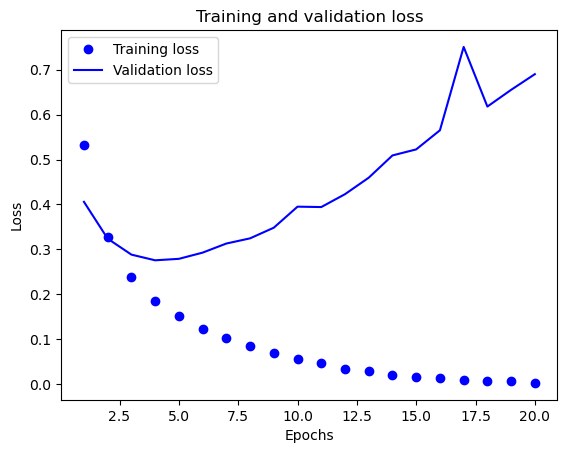

In [45]:
import matplotlib.pyplot as plt

#Plotting the training and validation loss


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['binary_accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

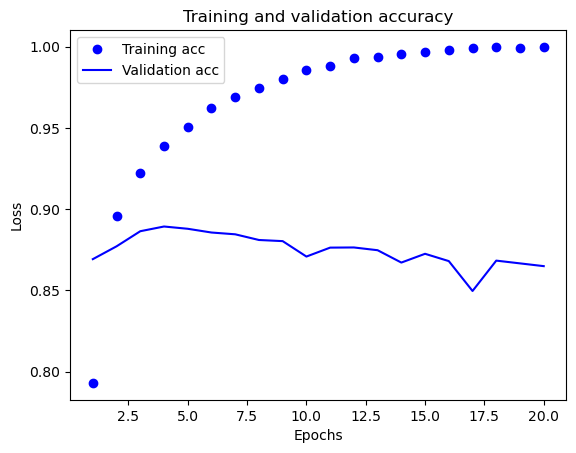

In [51]:
# Plotting the training and validation accuracy
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

what we’re seeing is overfitting: after the second epoch, we’re overoptimizing on the training data, and end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.
In this case, to prevent overfitting, you could stop training after three epochs. In general, we can use a range of techniques to mitigate overfitting,

In [52]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.5187 - binary_accuracy: 0.7943
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.3005 - binary_accuracy: 0.9073
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2206 - binary_accuracy: 0.9260
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2879 - binary_accuracy: 0.8842


[0.2878601849079132, 0.8841599822044373]

In [53]:
# Using a trained network to generate predictions on new data
model.predict(x_test)

array([[0.2764632 ],
       [0.99861777],
       [0.9307198 ],
       ...,
       [0.13002306],
       [0.08641118],
       [0.7416751 ]], dtype=float32)

## Retraining with new activation and dense layer units:-

In [54]:

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [55]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [56]:
model.fit(x_train, y_train, epochs=25, batch_size=512)

Epoch 1/25
49/49 [==============================] - 1s 12ms/step - loss: 0.4268 - accuracy: 0.8325
Epoch 2/25
49/49 [==============================] - 1s 12ms/step - loss: 0.2411 - accuracy: 0.9133
Epoch 3/25
49/49 [==============================] - 1s 11ms/step - loss: 0.1800 - accuracy: 0.9343
Epoch 4/25
49/49 [==============================] - 1s 11ms/step - loss: 0.1514 - accuracy: 0.9455
Epoch 5/25
49/49 [==============================] - 1s 11ms/step - loss: 0.1305 - accuracy: 0.9554
Epoch 6/25
49/49 [==============================] - 1s 12ms/step - loss: 0.1106 - accuracy: 0.9623
Epoch 7/25
49/49 [==============================] - 1s 12ms/step - loss: 0.1029 - accuracy: 0.9658
Epoch 8/25
49/49 [==============================] - 1s 12ms/step - loss: 0.0905 - accuracy: 0.9711
Epoch 9/25
49/49 [==============================] - 1s 12ms/step - loss: 0.0803 - accuracy: 0.9751
Epoch 10/25
49/49 [==============================] - 1s 11ms/step - loss: 0.0746 - accuracy: 0.9765
Epoch 11/

In [57]:
history = model.fit(partial_x_train, partial_y_train, epochs=25, batch_size=512, validation_data=(x_val, y_val))
history

Epoch 1/25
30/30 [==============================] - 3s 94ms/step - loss: 0.0115 - accuracy: 0.9989 - val_loss: 0.0155 - val_accuracy: 0.9978
Epoch 2/25
30/30 [==============================] - 1s 17ms/step - loss: 0.0264 - accuracy: 0.9935 - val_loss: 0.0192 - val_accuracy: 0.9964
Epoch 3/25
30/30 [==============================] - 1s 19ms/step - loss: 0.0097 - accuracy: 0.9989 - val_loss: 0.0215 - val_accuracy: 0.9959
Epoch 4/25
30/30 [==============================] - 0s 16ms/step - loss: 0.0094 - accuracy: 0.9989 - val_loss: 0.0294 - val_accuracy: 0.9920
Epoch 5/25
30/30 [==============================] - 1s 18ms/step - loss: 0.0204 - accuracy: 0.9958 - val_loss: 0.0469 - val_accuracy: 0.9860
Epoch 6/25
30/30 [==============================] - 0s 15ms/step - loss: 0.0083 - accuracy: 0.9989 - val_loss: 0.0575 - val_accuracy: 0.9822
Epoch 7/25
30/30 [==============================] - 0s 14ms/step - loss: 0.0075 - accuracy: 0.9991 - val_loss: 0.0750 - val_accuracy: 0.9774
Epoch 8/25
30

In [58]:
history_dict = history.history
print(history_dict.keys())
print(history_dict)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
{'loss': [0.011450939811766148, 0.026442045345902443, 0.009727614000439644, 0.009379743598401546, 0.020372437313199043, 0.008304912596940994, 0.007542124018073082, 0.014794363640248775, 0.006888174451887608, 0.006774970795959234, 0.01305233035236597, 0.006276857573539019, 0.006236863322556019, 0.0061819725669920444, 0.009620727971196175, 0.005660537630319595, 0.005640395916998386, 0.005618749186396599, 0.005613186862319708, 0.005612749606370926, 0.008170843124389648, 0.005428472068160772, 0.005078986752778292, 0.005062557756900787, 0.01034305989742279], 'accuracy': [0.9988666772842407, 0.9935333132743835, 0.9989333152770996, 0.9989333152770996, 0.9958000183105469, 0.9989333152770996, 0.9991333484649658, 0.9967333078384399, 0.9991999864578247, 0.9991999864578247, 0.996999979019165, 0.9992666840553284, 0.9992666840553284, 0.9992666840553284, 0.9984666705131531, 0.9993333220481873, 0.9993333220481873, 0.9993333220481873, 0.999333

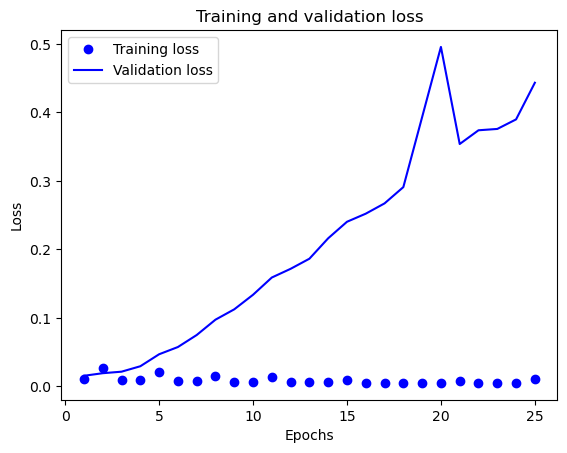

In [60]:
#Plotting the training and validation loss


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

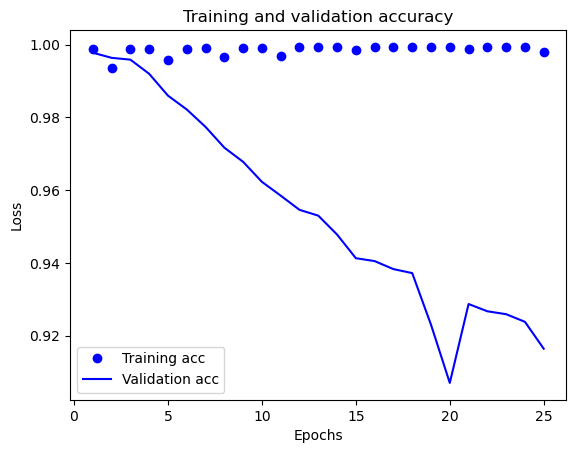

In [61]:
# Plotting the training and validation accuracy
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [70]:

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3
          , batch_size=512,validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
results

Epoch 1/3
49/49 [==============================] - 2s 41ms/step - loss: 0.4219 - accuracy: 0.8264 - val_loss: 0.2570 - val_accuracy: 0.9122
Epoch 2/3
49/49 [==============================] - 1s 16ms/step - loss: 0.2295 - accuracy: 0.9156 - val_loss: 0.1606 - val_accuracy: 0.9473
Epoch 3/3
782/782 [==============================] - 1s 2ms/step - loss: 0.2984 - accuracy: 0.8830


[0.2984010577201843, 0.8830400109291077]

In [81]:
# Using a trained network to generate predictions on new data
predicted_prob = model.predict(x_test)

In [84]:
predicted_value = list(map(lambda x: 0.0 if x<0.5 else 1, predicted_prob))
predicted_value

[0.0,
 1,
 1,
 1,
 1,
 1,
 1,
 0.0,
 1,
 1,
 1,
 0.0,
 0.0,
 0.0,
 1,
 0.0,
 1,
 1,
 0.0,
 0.0,
 1,
 1,
 0.0,
 1,
 1,
 1,
 0.0,
 1,
 1,
 0.0,
 1,
 0.0,
 1,
 0.0,
 0.0,
 0.0,
 1,
 1,
 0.0,
 0.0,
 1,
 1,
 0.0,
 1,
 1,
 1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1,
 1,
 1,
 1,
 1,
 1,
 0.0,
 1,
 0.0,
 0.0,
 1,
 0.0,
 0.0,
 1,
 0.0,
 1,
 1,
 1,
 1,
 1,
 1,
 0.0,
 0.0,
 0.0,
 0.0,
 1,
 1,
 0.0,
 1,
 0.0,
 1,
 1,
 0.0,
 0.0,
 0.0,
 1,
 0.0,
 1,
 1,
 1,
 0.0,
 1,
 1,
 0.0,
 1,
 1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1,
 1,
 1,
 0.0,
 1,
 0.0,
 0.0,
 1,
 1,
 0.0,
 1,
 1,
 0.0,
 0.0,
 0.0,
 1,
 1,
 1,
 1,
 0.0,
 0.0,
 0.0,
 1,
 0.0,
 0.0,
 1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1,
 0.0,
 1,
 0.0,
 0.0,
 1,
 1,
 1,
 1,
 0.0,
 0.0,
 0.0,
 1,
 1,
 0.0,
 1,
 1,
 1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1,
 0.0,
 1,
 1,
 0.0,
 0.0,
 0.0,
 1,
 0.0,
 1,
 1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1,
 0.0,
 0.0,
 0.0,
 1,
 0.0,
 1,
 1,
 0.0,
 0.0,
 0.0,
 1,
 1,
 0.0

In [85]:
print(f'Confusion Matrix : \n {confusion_matrix(y_test,predicted_value)}')

Confusion Matrix : 
 [[10777  1723]
 [ 1201 11299]]


In [78]:
predicted[0]

array([0.16871363], dtype=float32)

In [79]:
y_test[0]

0.0

In [76]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score

In [2]:
print('Train set Performance')
print(f'Accuracy is {accuracy_score(y_test,predicted_value)}')
print(f'Confusion Matrix : \n {confusion_matrix(y_test,predicted_value)}')
print(f'ROC_AUC_Score: {roc_auc_score(y_test,predicted_value)}')

Train set Performance


NameError: name 'accuracy_score' is not defined

### Model Training using Regulariation